In [41]:
from msilib.schema import SelfReg
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os
import glob
from math import sqrt
import scipy.fftpack

In [42]:
class Frequency_Features_Extraction():
    def __init__(self,path,filename,column):
        self.path = path
        self.filename = filename

        self.dataset=pd.read_csv(os.path.join(path, self.filename), sep='\t',header=None)

        self.bearing_no = column
        self.bearing_data = np.array(self.dataset.iloc[:,self.bearing_no-1])

        self.feature_matrix=np.zeros((1,9))

        self.N = len(self.bearing_data)

        self.freq_sample = 20480
        self.rpm = 2000

        self.time_vector = np.linspace(0,1,self.freq_sample)

        self.raw_data = np.array((self.bearing_data,self.time_vector))

        self.no_balls = 18
        self.coeficiente_rolamento = self.no_balls*self.rpm
        
        # Dados encontrados em https://www.rexnord.com/products/za2115
        self.Frequency_Fundamental_Train = 0.0072*self.coeficiente_rolamento
        self.Frequency_Inner_Ring_Defect = 0.1617*self.coeficiente_rolamento
        self.Frequency_Outer_Ring_Defect = 0.1217*self.coeficiente_rolamento
        self.Frequency_Roller_Spin = 0.0559*self.coeficiente_rolamento

        
        # Aplicando a transformada de Fourier
        self.fourier = scipy.fftpack.fft(self.raw_data)

        self.xf = self.time_vector
        self.yf = self.fourier

        self.first_point = 100
        self.yf = self.yf[0,:]

        # Verificar se esta discretização da frequência está correta
        self.xf = np.linspace(0,self.freq_sample//2,self.freq_sample//2)

        # Janela de pico
        self.window = 10


        # Retirado do código em matlab

        self.k = np.linspace(0,self.N-1,self.N)                          # k é um vetor que vai de zero até N menos 1
        self.T = self.N/self.freq_sample                           # Vetor de tempo N dividido pela frequência de amostragem
    
        self.X = np.fft.fftn(self.raw_data)/self.N                      # X recebe a FFT normalizada do vetor x sobre N
        self.cutOff = (self.N//2)                 # cutOff ajusta o eixo X
        self.X = self.X[1:self.cutOff]
        self.freq = np.linspace(1,self.cutOff,self.cutOff+1)
        # figure()
        # plot(freq(1:cutOff),abs(X))        # Plota a transformada de Fourier e o valor de X em módulo

    def plot_fourier(self):
        # for i in range(0,len(self.yf)):
        #     self.yf[i] = self.rms()

        self.desvio = np.std(self.yf)
    
        self.yf = self.yf/self.desvio
        self.fig, self.ax = plt.subplots()
        self.ax.plot(self.xf, np.abs(self.yf[:self.N//2]))
        plt.title('FFT')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude / RMS')
        
        # plt.axvline(x = self.Frequency_Fundamental_Train, color = 'r', label = 'axvline - full height')
        # plt.axvline(x = self.Frequency_Inner_Ring_Defect, color = 'b', label = 'axvline - full height')
        # plt.axvline(x = self.Frequency_Outer_Ring_Defect, color = 'g', label = 'axvline - full height')
        # plt.axvline(x = self.Frequency_Roller_Spin, color = 'y', label = 'axvline - full height')
        # plt.axvline(x = self.rpm, color = 'r', label = 'axvline - full height')

        plt.axhline(y = np.std(self.yf), color = 'r', label = 'axvline - full height')
        plt.axvline(x = 1900,color = 'y')

        plt.ylim([0.9, 20])
        plt.xlim([self.first_point, len(self.yf)//2])
        plt.show()

    def PicosRPM(self):
        pass
    
    def PicosPistaExterna(self):
        pass

    def PicosPistaInterna(self):
        pass

    def PicosGaiola(self):
        pass

    def PicosRolo(self):
        pass    
    
    def rms(self):
        self.rms_value = sqrt(sum(n*n for n in self.bearing_data[0:len(self.bearing_data)//100])/self.N)        
        return self.rms_value 


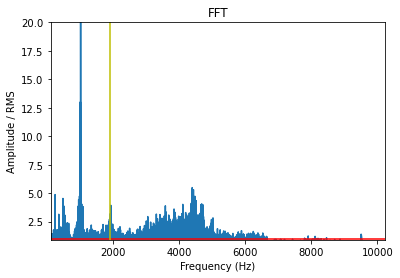

In [43]:
test_outer_race_inicio = Frequency_Features_Extraction('C:/Users/leona/Documents/ProjetoFinal_LeonardoPacheco_UFRJ_LAVI/database/brutos/2nd_test','2004.02.12.12.22.39',1)

test_outer_race_inicio.plot_fourier()

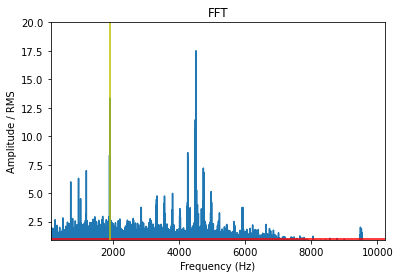

In [44]:
test_outer_race_fim = Frequency_Features_Extraction('C:/Users/leona/Documents/ProjetoFinal_LeonardoPacheco_UFRJ_LAVI/database/brutos/2nd_test','2004.02.19.05.42.39',1)

test_outer_race_fim.plot_fourier()

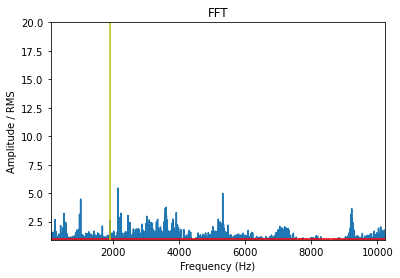

In [45]:
test_outer_race_fim = Frequency_Features_Extraction('C:/Users/leona/Documents/ProjetoFinal_LeonardoPacheco_UFRJ_LAVI/database/brutos/1st_test','2003.11.24.08.51.24',6)

test_outer_race_fim.plot_fourier()